## 題目一 (50%)

### 題目敘述

這題使用OkCupid的資料集（[資料來源](https://www.kaggle.com/andrewmvd/okcupid-profiles)）。OkCupid是一個美國的交友網站，使用者可以在上面填寫個人資料，並且透過填寫的資料找到適合的對象。資料集有這些欄位：
  - age: 年齡
  - status: 婚姻狀況
  - sex: 性別
  - orientation: 性傾向
  - body_type: 體型
  - diet: 飲食習慣
  - drinks: 飲酒習慣
  - drugs: 藥物使用習慣
  - education: 教育程度
  - ethnicity: 種族
  - height: 身高
  - income: 收入
  - job: 職業
  - last_online: 最後上線時間
  - location: 地點
  - offspring: 子女
  - pets: 寵物
  - religion: 宗教
  - sign: 星座
  - smokes: 抽菸習慣
  - speaks: 語言

---

### 程式要求

1. 準備
  * 使用seaborn預設的theme。
  * 將figsize設為(16, 9)。
  * 從 `okcupid.csv` 中讀取資料，存放於名為 `ok` 的dataframe中。
2. 使用者性別與種族分析
  * 將 `ok` 的sex和ethnicity欄位複製到一個新的dataframe叫 `eth`。
  * 將ethnicity欄位中的NaN值填補上 `Other`。
  * 分離ethnicity欄位中的多個種族，並給每個種族自己一個橫列，例如：

    |   | sex | ethnicity    |
    |---|-----|--------------|
    | 0 | f   | white, asian |

      這將被轉換為：

    |   | sex | ethnicity |
    |---|-----|-----------|
    | 0 | f   | white     |
    | 0 | f   | asian     |

  * 用seaborn的 `countplot` 畫出男女性使用者的種族分布，如下面的橫條圖。

3. 使用者性別與年齡分析
  * 使用seaborn的 `displot` 畫出男女性使用者的年齡分布，如下面的堆疊直方圖。
  * bins設為 `np.arange(16, 80, 3)`。
  * 高度和寬高比設為 `height=8, aspect=1.5`。

4. 繪製圓餅圖
  * 定義一個 `bake_pie` 函數，輸入是 `ok` 這個dataframe裡的其中一個欄位，輸出則是該欄位的圓餅圖。
    * 畫出 sex 的圓餅圖。
    * 畫出 drinks 的圓餅圖。
    * 畫出 smokes 的圓餅圖。


### 男女性使用者的種族分布圖

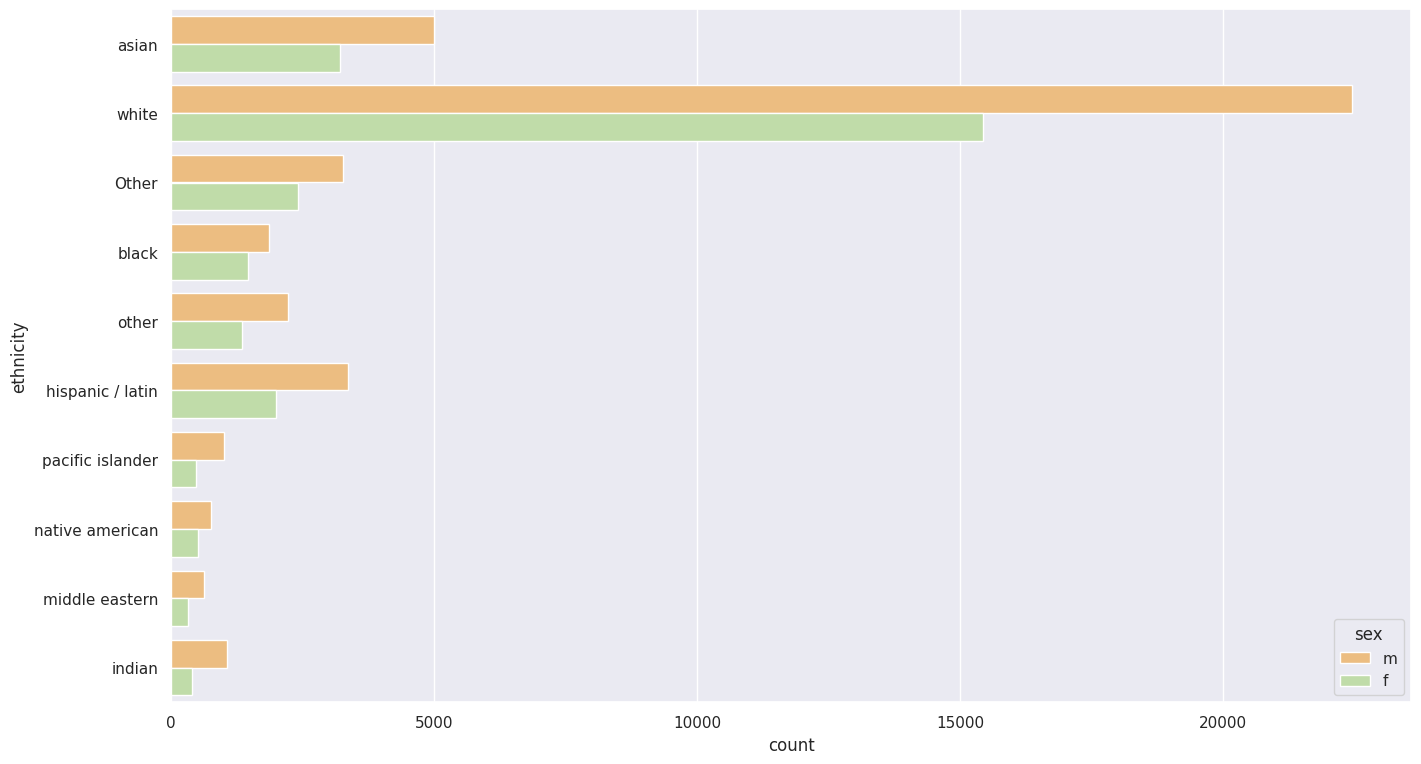


### 男女性使用者的年齡分布圖
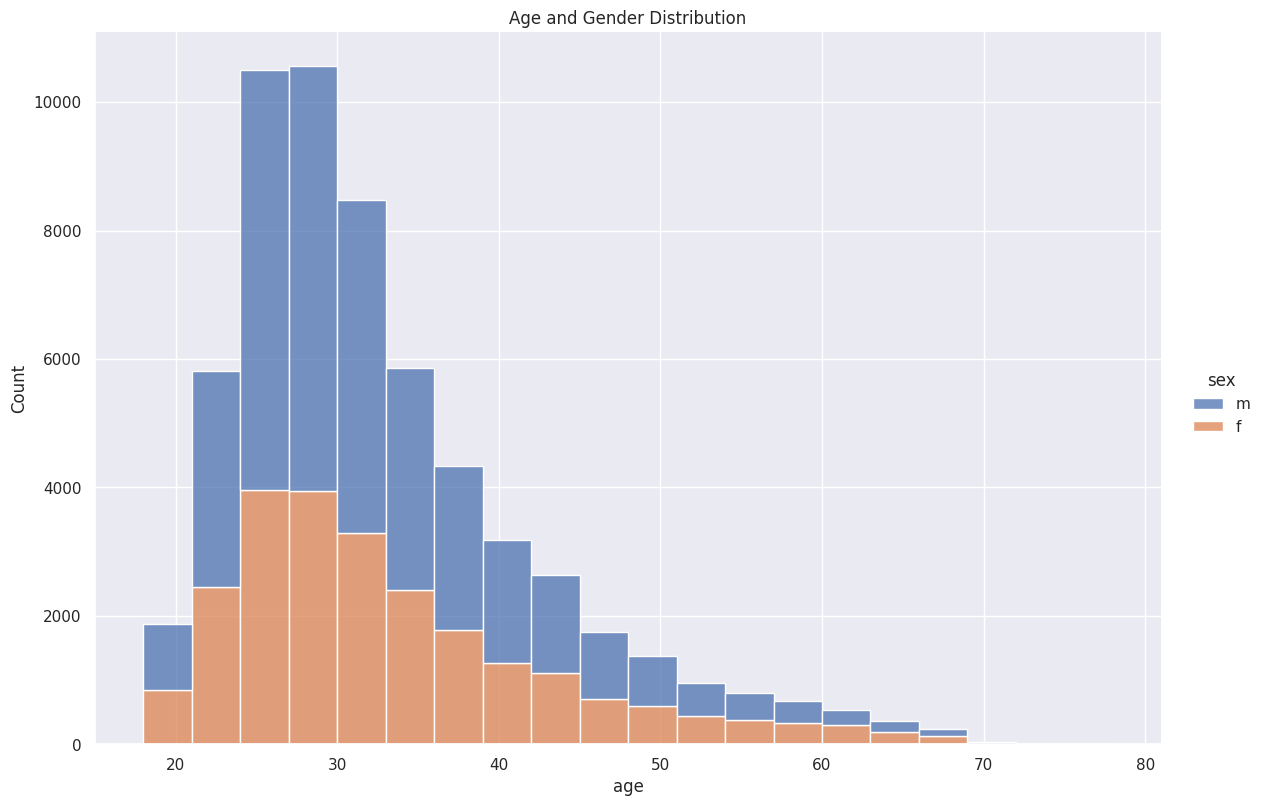

### sex 圓餅圖

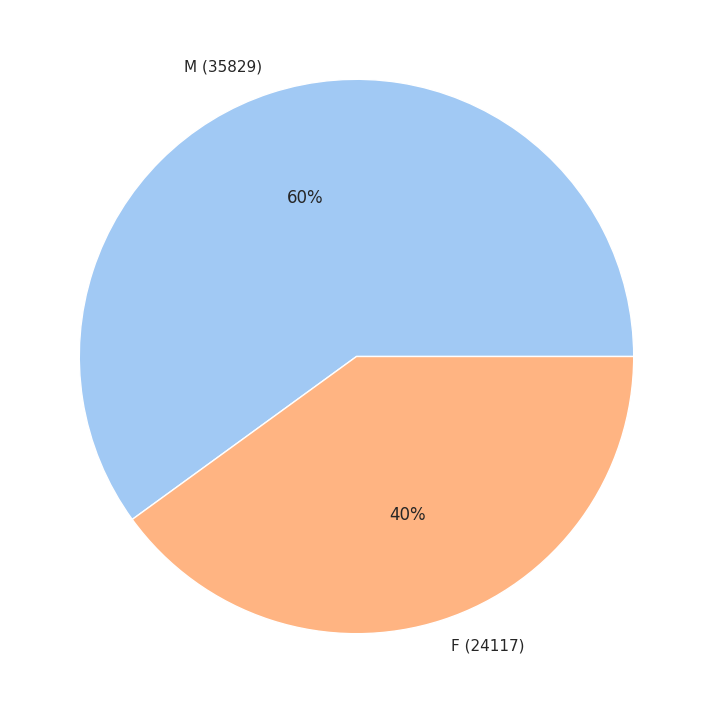

### drinks 圓餅圖

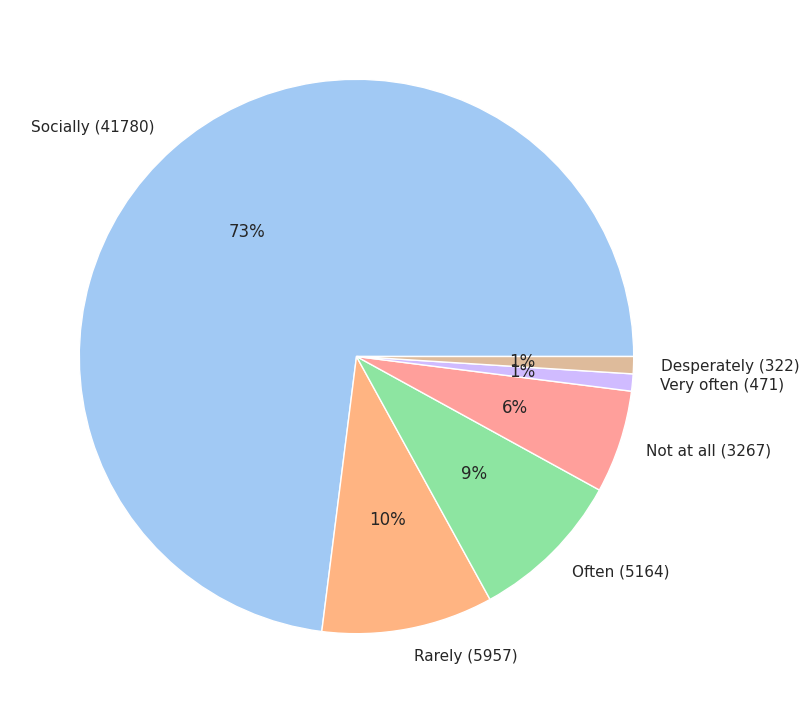

### smokes 圓餅圖

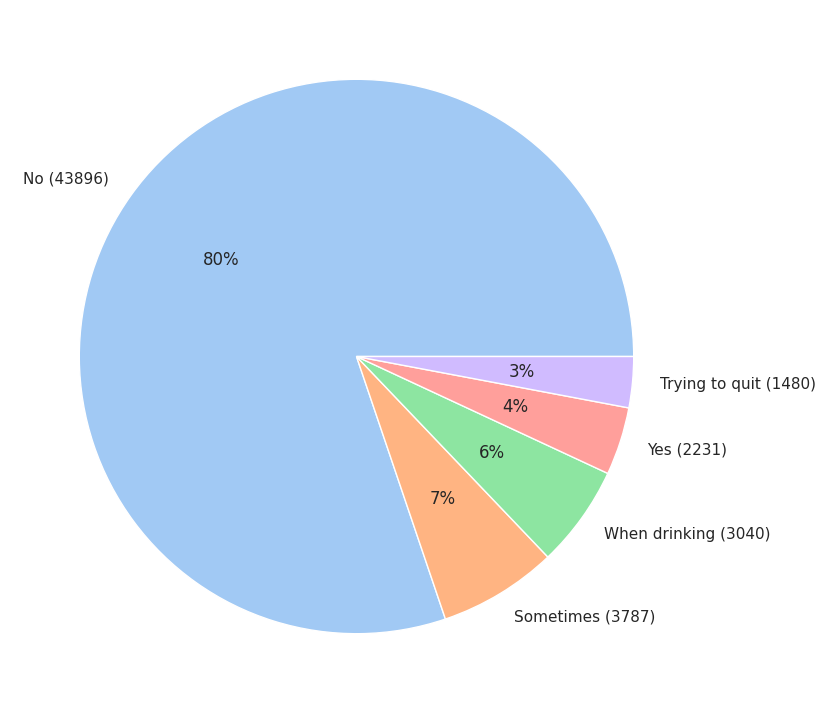

In [908]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
##1
sns.set(rc={"figure.figsize": (16, 9)})
ok = pd.read_csv('okcupid.csv')

##2
eth=pd.DataFrame({'sex':ok['sex'],'ethnicity':ok['ethnicity']})
eth=eth.fillna('other')  

for i in range(0,len(eth)):
    if len(eth['ethnicity'][i].split(', '))>1: 
        e=eth['ethnicity'][i].split(', ')    
        for j in range(1,len(e)):
            eth.loc[len(eth)]=[eth['sex'][i],e[j]]
        eth['ethnicity'][i]=str(eth['ethnicity'][i].split(',')[0])


<Axes: xlabel='count', ylabel='ethnicity'>

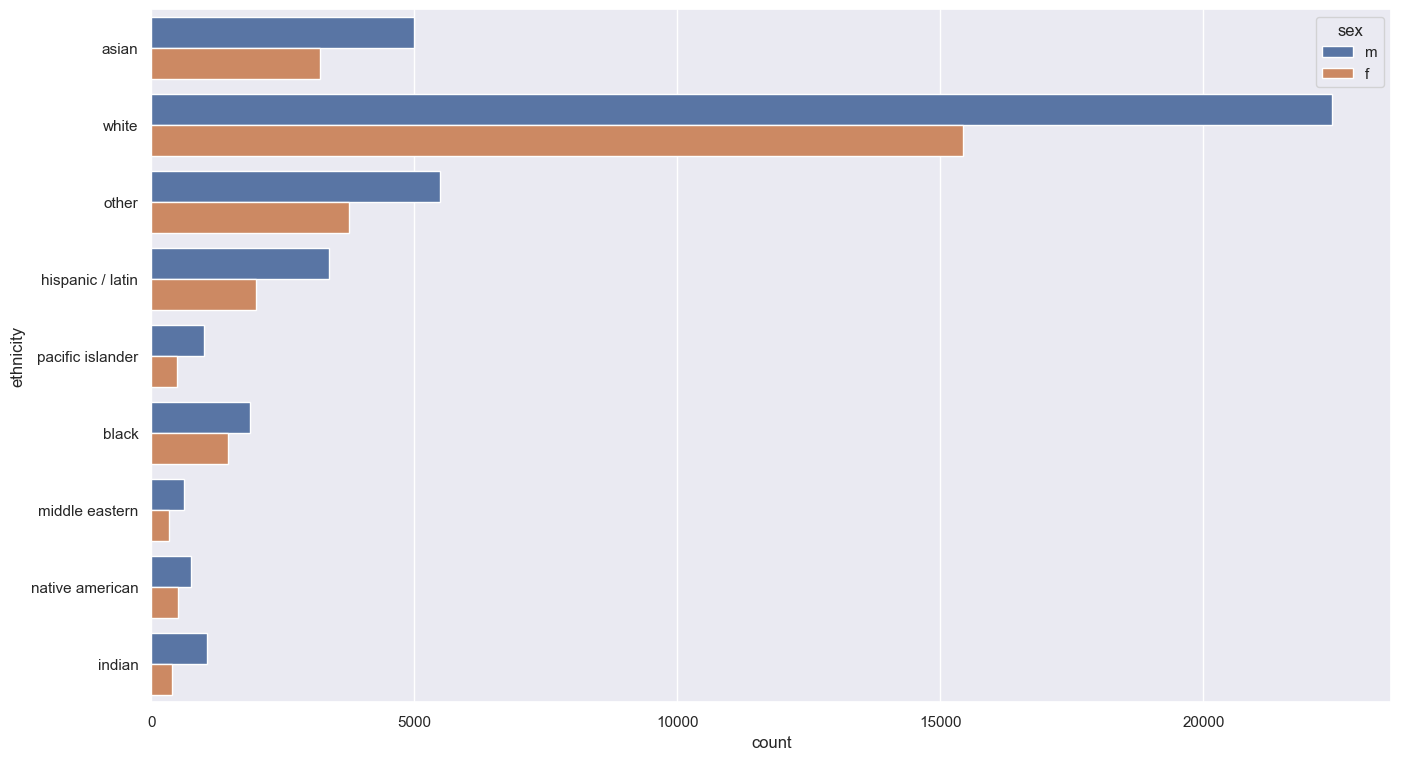

In [909]:
##2
sns.countplot(y ='ethnicity',hue='sex', data = eth)

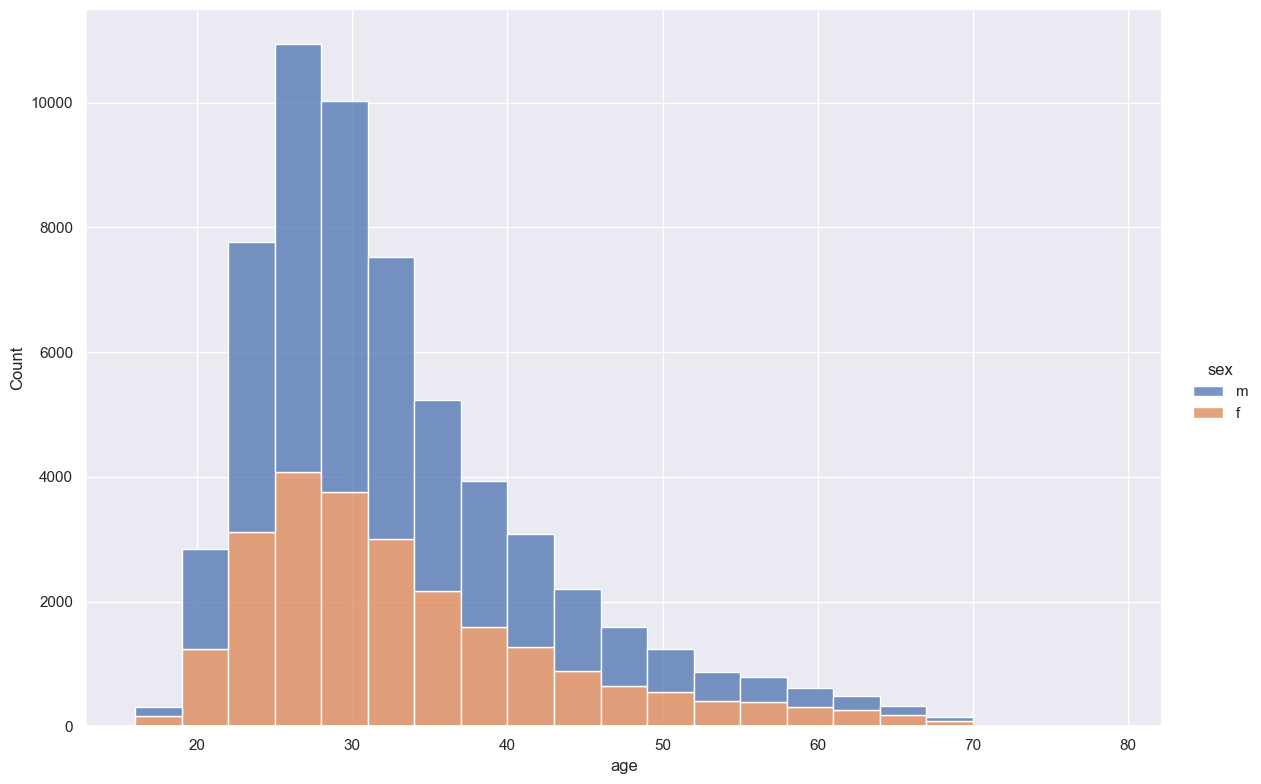

In [910]:
sex_age=pd.DataFrame({'sex':ok['sex'],'age':ok['age']})
sns.displot(x=sex_age['age'],hue='sex',data=sex_age,bins=np.arange(16, 80, 3),height=8,aspect=1.5,multiple='stack')

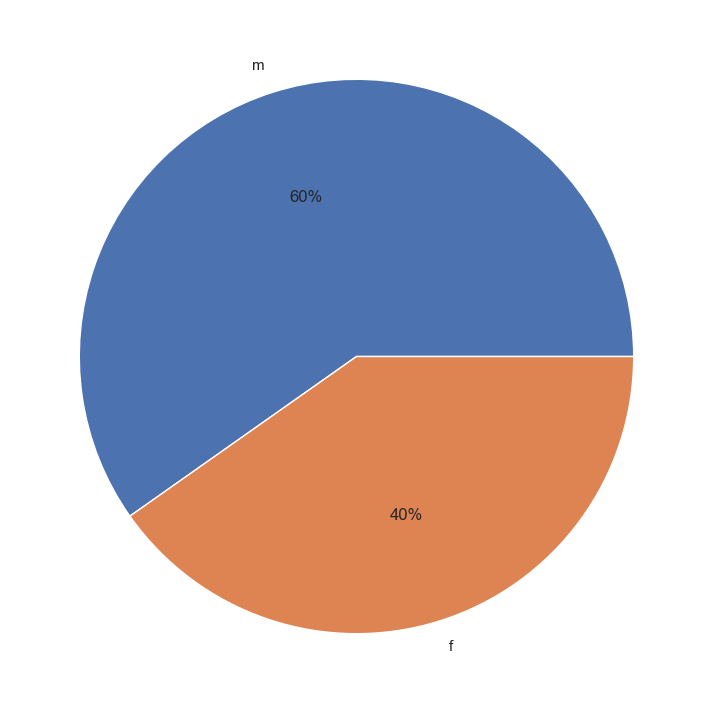

In [911]:
def bake_pie(a):
    sns.set(rc={"figure.figsize": (16, 9)})
    ok = pd.read_csv('okcupid.csv')
    a=str(a)
    label=[]
    ok[a].dropna()
    for i in ok[a].unique():
        if type(i)!=float :  
            label.append(i)
    plt.pie(data=ok[a],autopct="%0.0f%%",x=ok[a].value_counts(),labels=label )
bake_pie('sex')


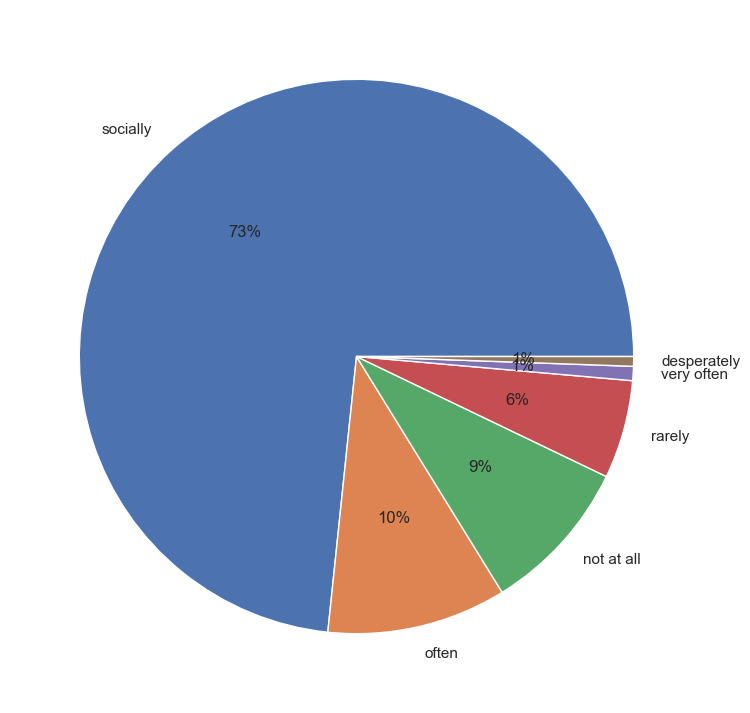

In [912]:
bake_pie('drinks')



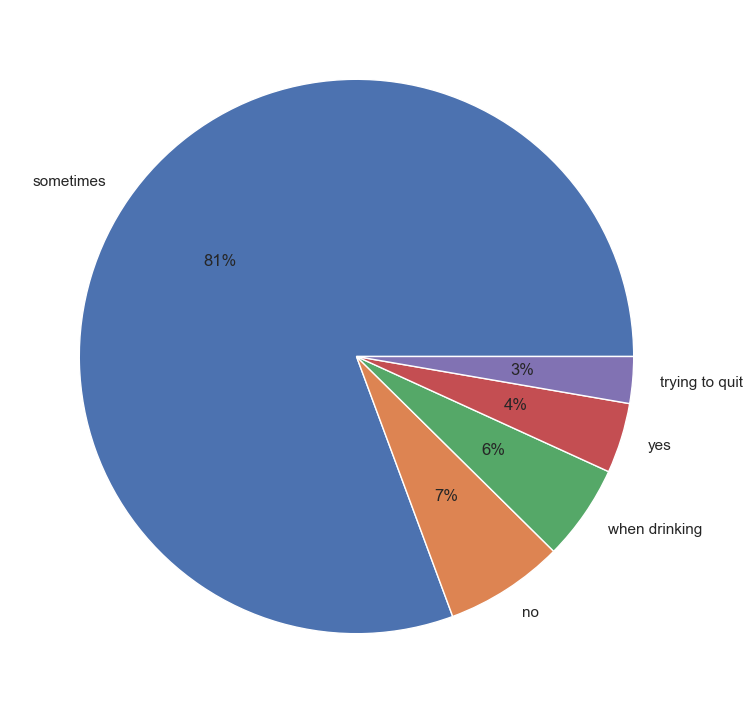

In [913]:
bake_pie('smokes')

## 題目二 (50%)

### 題目敘述

這題會使用一份天氣資料集，記錄自1979/01/01至2020/12/31之間倫敦的天氣狀況（[資料來源](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data/data) ）。這個資料集中包含以下10個欄位：

  - date: 測量日期（整數）
  - cloud_cover: 雲覆蓋量，單位為oktas（浮點數）
  - sunshine: 日照時數（浮點數）
  - global_radiation: 全球輻射量，單位為每平方米瓦特（W/m²）（浮點數）
  - max_temp: 最高溫度，單位為攝氏度（°C）（浮點數）
  - mean_temp: 平均溫度，單位為攝氏度（°C）（浮點數）
  - min_temp: 最低溫度，單位為攝氏度（°C）（浮點數）
  - precipitation: 降水量，單位為公釐（mm）（浮點數）
  - pressure: 氣壓，單位為帕斯卡（Pa）（浮點數）
  - snow_depth: 雪深，單位為公分（cm）（浮點數）


---

### 程式要求

1. 讀取資料
  - 從 `london_weather.csv` 讀取資料，並存放於名為 `df` 的dataframe中。
2. 前處理
  - 確認每個欄位中是否有空值，如果有的話，將其補上0。
  - 將date欄位值的格式轉換為：`YYYY-MM-DD`，如1979-01-01。
  - 根據更新後的date欄位，另外新增兩個欄位：month（月份）和 year（年份）。
  - 用 `.head()` 將 `df` 列印出來。
3. 溫度趨勢分析（見下圖，請盡可能畫得一樣）
  - 繪製時間序列折線圖
    - x軸為年份，以五年為一個間隔顯示。
    - y軸為溫度，以2度為一個間隔顯示。
    - 圖中應包含三條折線，顯示1979至2020年間倫敦的最低溫度、平均溫度和最高溫度。
  - 繪製熱力圖
    - x軸為年份，以五年為一個間隔顯示。
    - y軸為月份，每個月份都要顯示。
    - 圖中的數值對應於每個月份的平均溫度。
    - 圖中應顯示不同顏色，代表不同的溫度級別（顏色設為 `coolwarm` ）。

### 時間序列折線圖

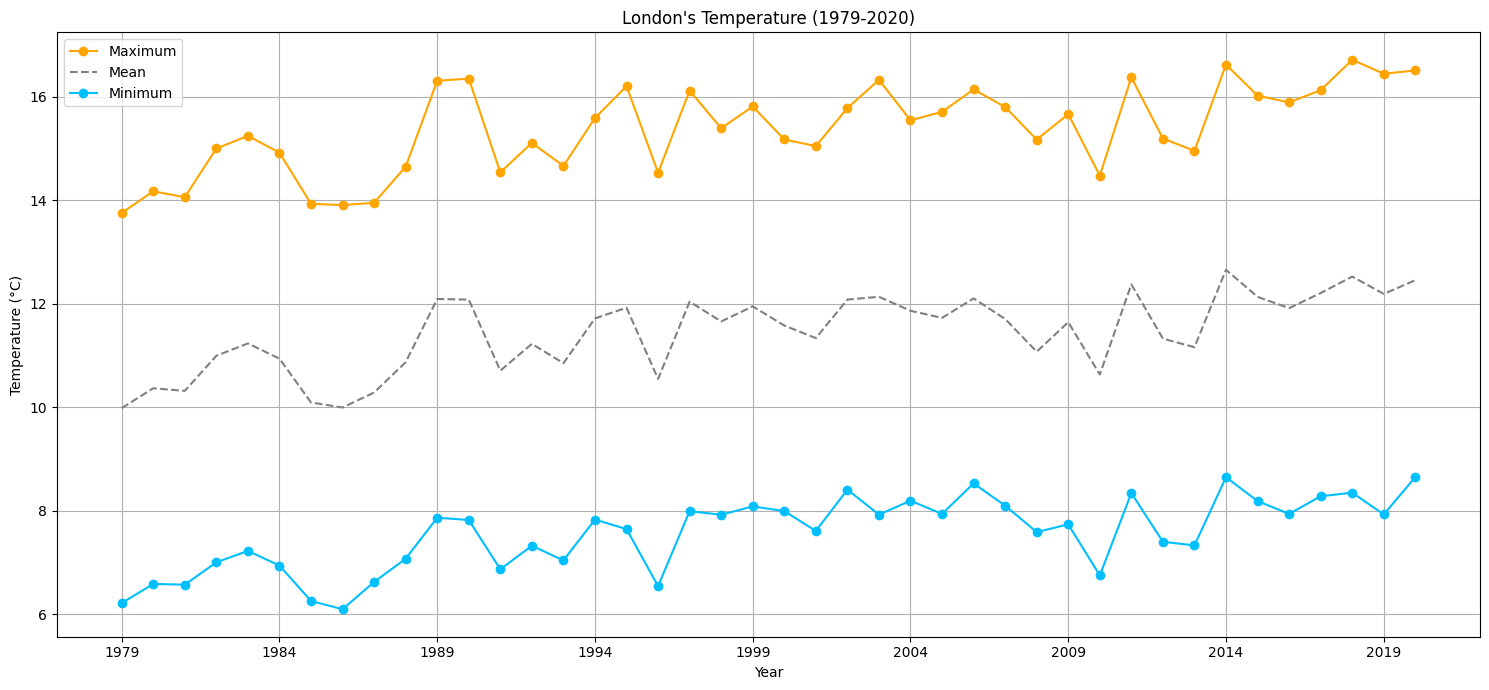

### 熱力圖

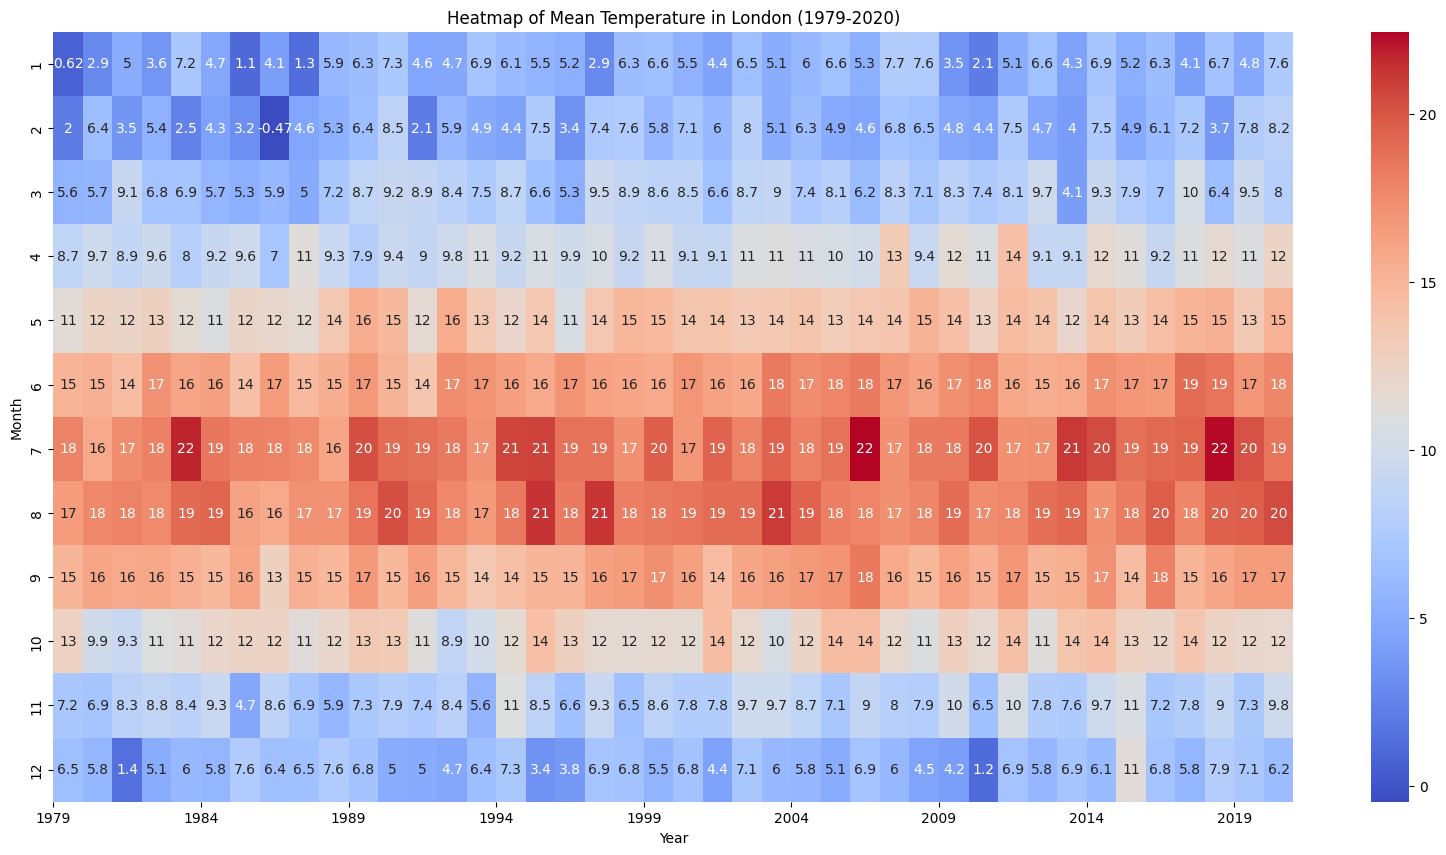

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('london_weather.csv')
df=df.fillna(0)
year=[]
month=[]
for i in range(0,len(df['date'])):
    date=list(str(df['date'][i]))
    a=date[0:4]
    b=date[4:6]
    date.insert(4,'-')
    date.insert(7,'-')
    a=str(a[0])+str(a[1])+str(a[2])+str(a[3])
    b=str(b[0])+str(b[1])
    date=str(date[0])+str(date[1])+str(date[2])+str(date[3])+str(date[4])+str(date[5])+str(date[6])+str(date[7])+str(date[8])+str(date[9])
    year.append(a)
    month.append(b)
    df['date'][i]=str(date)
df['year']=year
df['month']=month
df.head()


C:\Users\cvb09\AppData\Local\Temp\ipykernel_19684\3179977624.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i]=str(date)
C:\Users\cvb09\AppData\Local\Temp\ipykernel_19684\3179977624.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1979-01-01' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['date'][i]=str(date)


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,01
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,01
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,01
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,01
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,01


In [5]:
max_avg={}
mean_avg={}
min_avg={}
avg=0
a=1
df=df.fillna(0)
year_data=df['year'].value_counts().to_dict()
##max
for i in range(0,len(df['max_temp'])):
    if df['year'][i] in year_data:
        avg=avg+df['max_temp'][i]/year_data[df['year'][i]]
        a=a+1
    if a==year_data[df['year'][i]]:
        max_avg.update({df['year'][i]:avg})
        a=0
        avg=0

##mean
for i in range(0,len(df['mean_temp'])):
    if df['year'][i] in year_data:
        avg=avg+df['mean_temp'][i]/year_data[df['year'][i]]
        a=a+1
    if a==year_data[df['year'][i]]:
        mean_avg.update({df['year'][i]:avg})
        a=0
        avg=0
##min
for i in range(0,len(df['min_temp'])):
    if df['year'][i] in year_data:
        avg=avg+df['min_temp'][i]/year_data[df['year'][i]]
        a=a+1
    if a==year_data[df['year'][i]]:
        min_avg.update({df['year'][i]:avg})
        a=0
        avg=0


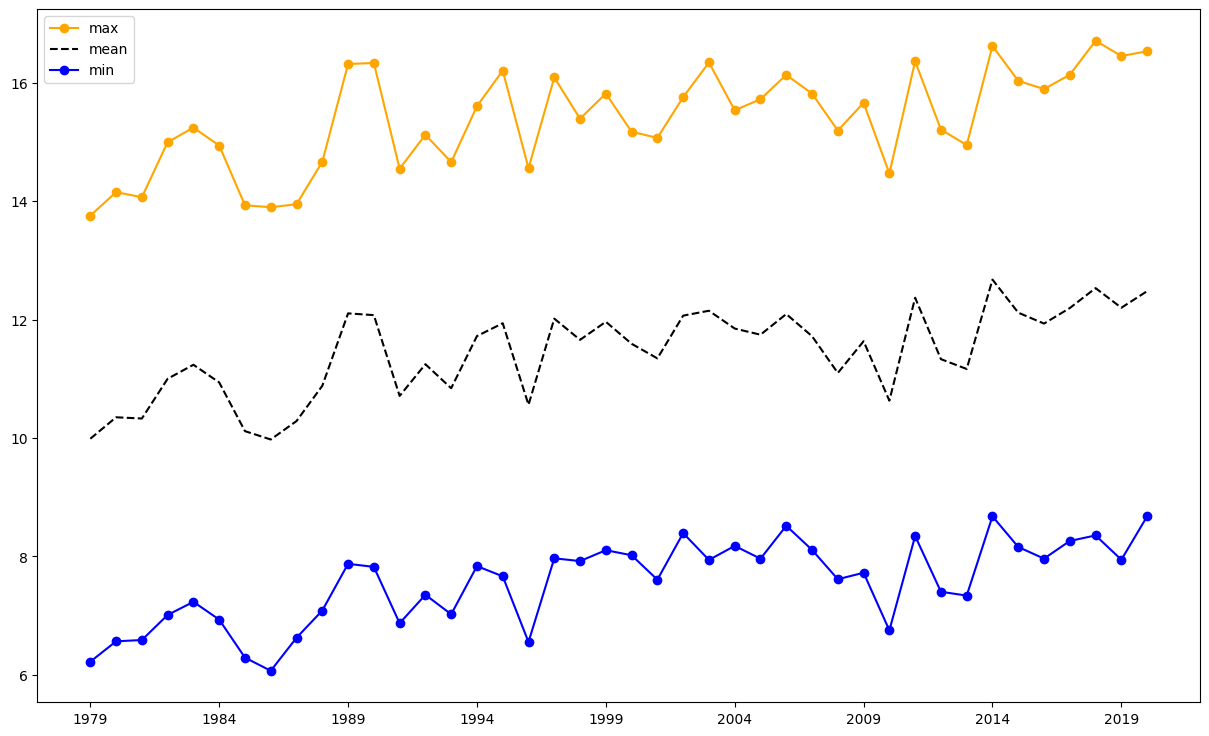

In [6]:
plt.figure(figsize=(15,9))
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

abc=[1979,1984,1989,1994,1999,2004,2009,2014,2019]
plt.plot(mean_avg.keys(),max_avg.values(), marker='o', color='orange')
plt.plot(mean_avg.keys(),mean_avg.values(), linestyle='--', color='black')
plt.plot(mean_avg.keys(),min_avg.values(), marker='o', color='blue')
x_major_locator = MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel=('year')
plt.ylabel=('temper')
plt.title=('year&temper')
plt.legend(['max','mean','min'])


<Axes: >

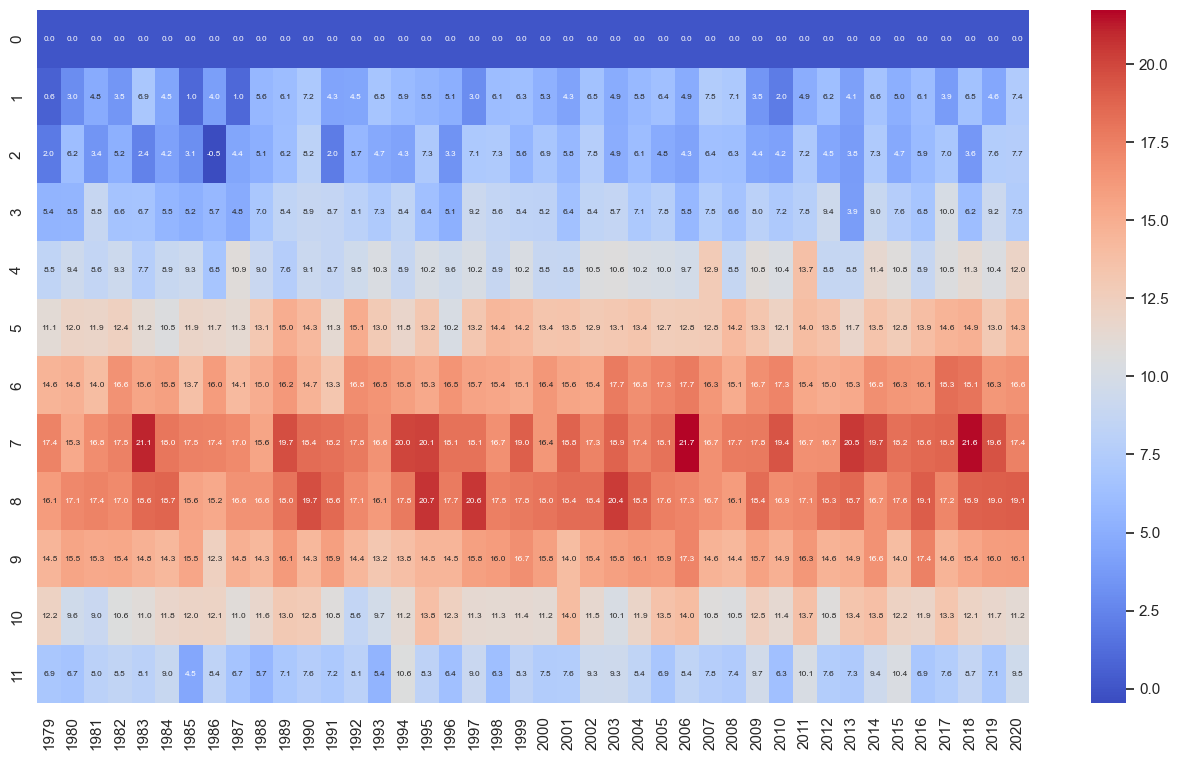

In [23]:
Y_M={'1979':[]}
year=[]
day=1
df=df.fillna(0)
sum=0
b=0
sns.set(rc={"figure.figsize": (16, 9)})
month_data=df['month'].value_counts().to_dict()
##max
for i in range(0,len(df['mean_temp'])):

    if  df['year'][i]  in Y_M : 
        if str(df['month'][i])==a  :
            sum=sum+df['mean_temp'][i]
            day=day+1
        else:
            year.append(sum/(day))
            sum=0
            day=1
            sum=sum+df['mean_temp'][i]
            day=day+1
            
        Y_M.update({df['year'][i]:year})
        a=df['month'][i]
    else:
        Y_M.update({df['year'][i]:year})
        year=[]
        sum=0
        day=1
ans=pd.DataFrame(Y_M)
sns.heatmap(ans,fmt='.1f', annot_kws={"size": 6},annot=True,
            cmap="coolwarm")


## 加分題 (20%)

呈題目二，請自行從資料集中額外挑選**三個**變量進行視覺化分析。最後結合溫度趨勢的發現，回答你認為最適合前往倫敦旅遊的時機。

### 分析指引
- 選擇變量：挑選如降水量、日照時數和降雪量等可能影響旅遊體驗的變量。
- 視覺化：針對每個選定的變量繪製圖表，選擇折線圖、柱狀圖或散點圖等上課教過的繪圖方法。
- 綜合評估：考慮溫度、降水、日照等因素，分析倫敦何時的天氣條件最適合旅遊。

### 提交要求
- 圖表：提交**三張**反映所選變量的圖表，並確保圖表清晰、標籤齊全。
- 文字說明：在最後說明你認為的最佳旅遊時間及原因。